<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

***
# Добрый день 
## Меня зовут Михаил и в данный момент Вы открыли мой проект анализа вакансий с сайта HeadHunter.
### В данном проекте я попытаюсь:
    
* Исследовать структуру данных
    * Получить все необходимые данные
    * Выявить данные, которые необходимо преобразовать
* Преобразовать данные
    * Разделить столбцы с несколькими признаками
    * Создать новые столбцы с отдельными признаками
    * Избавиться от ненужных столбцов
* Исследовать зависимости в данных
    * Провести визуализацию данных
    * Найти аномальные значения
    * Сделать соответствующие выводы
* Провести очистку данных
    * Избавиться от вбросов
    * Заполнить пустые значения

#### Данный проект позволит глубже понять основные принципы работы Дата Сайентиста, а также закрепить все полученные за четыре месяца знания на практике.
### Давайте приступим!
***


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [402]:
hh = pd.read_csv("https://dl.dropboxusercontent.com/s/6u7g12urt0p1jmu/hh_df.csv?dl=0", sep=";")
display(hh.shape)

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [403]:
display(hh.tail())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [404]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [405]:
hh['Опыт работы'].nunique()
hh['Ищет работу на должность:'].value_counts()

Системный администратор                                                  3099
Инженер                                                                   966
Аналитик                                                                  809
Менеджер проектов                                                         745
Руководитель проекта                                                      718
                                                                         ... 
Системный администратор Linux, DevOps, Разработчик Golang                   1
Инженер КИПиА,инженер АСУТП ,видеоинженер                                   1
SEO-специалист | Специалист по интернет-рекламе | Интернет-маркетолог       1
Специалист технических систем безопастности                                 1
Аналитик данных, Математик                                                  1
Name: Ищет работу на должность:, Length: 14929, dtype: int64

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [406]:
def get_education(education):
    education = ' '.join(education.split(' ')[:3])
    if 'Неоконченное высшее' in education:
        return 'Неоконченное высшее'
    elif 'Высшее образование' in education:
        return 'Высшее'
    elif 'Среднее специальное' in education:
        return 'Среднее специальное'
    elif 'Среднее образование' in education:
        return 'Среднее'
    else:
        return 'Неизвестно'

hh['Образование'] = hh['Образование и ВУЗ'].apply(get_education)

hh = hh.drop('Образование и ВУЗ', axis=1)
hh['Образование'].value_counts()

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [407]:
def get_gender(gender):
    if 'Мужчина' in gender:
        return 'М'
    if 'Женщина' in gender:
        return 'Ж'

hh['Пол'] = hh['Пол, возраст'].apply(get_gender)
hh['Пол'].value_counts()
round(8533/(36211+8533)*100, 2)

def get_age(age):
    age_splitted = age.split(' ')
    year_words = ['год', 'года', 'лет']
    for index, item in enumerate(age_splitted):
        if item in year_words:
            return int(age_splitted[index-1])

hh['Возраст'] = hh['Пол, возраст'].apply(get_age)
hh['Возраст'].mean()
hh = hh.drop('Пол, возраст', axis=1)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [408]:
def get_exp(exp):
    if exp is np.nan or exp == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    exp_splitted = exp.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (exp_splitted):
        if item in year_words:
            years = int(exp_splitted[index-1])
        if item in month_words:
            months = int(exp_splitted[index-1])
    return int(years*12 + months)
hh['Опыт работы (месяц)'] = hh['Опыт работы'].apply(get_exp)
hh = hh.drop('Опыт работы', axis=1)
print(round(hh['Опыт работы (месяц)'].median()))

100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [409]:
def get_city(cities):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = cities.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'Город миллионник'
    else:
        return 'Другие'
    
def get_ready_to_move(move):
    if ('не готов к переезду' in move) or ('не готова к переезду' in move):
        return False
    elif 'хочу' in move:
        return True
    else:
        return True
    
def get_ready_for_bisiness_trips(trips):
    if ('командировка' in trips):
        if ('не готов к командировкам' in trips) or('не готова к командировкам' in trips):
            return False
        else: 
            
            return True
    else:
        return False
    
hh['Город'] = hh['Город, переезд, командировки'].apply(get_city)
hh['Готовность к переезду'] = hh['Город, переезд, командировки'].apply(get_ready_to_move)
hh['Готовность к командировкам'] = hh['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
hh = hh.drop('Город, переезд, командировки', axis=1)
print(round(hh['Город'].value_counts()['Санкт-Петербург'] / hh['Город'].shape[0] * 100)) 
print(round(hh[hh['Готовность к переезду'] & hh['Готовность к командировкам']].shape[0] / hh.shape[0] * 100))

11
32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [410]:
employment_kinds = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
options = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
for employment_kind, option in zip(employment_kinds, options):
    hh[employment_kind] = hh['Занятость'].apply(lambda x: employment_kind in x)
    hh[option] = hh['График'].apply(lambda x: option in x)
hh = hh.drop('Занятость', axis=1)
#hh = hh.drop('График', axis=1)
print(hh[hh['проектная работа'] & hh['волонтерство']].shape[0])
print(hh[hh['вахтовый метод'] & hh['гибкий график']].shape[0])

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [411]:
exch = pd.read_csv('data/ExchangeRates.csv', sep=',')

hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], dayfirst=True).dt.date
exch['date'] = pd.to_datetime(exch['date'], dayfirst=True).dt.date

def get_salary(salary):
    salary_list = salary.split(' ')
    return salary_list[0]
def get_currency(cur):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = cur.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]
hh['Список Валют'] = hh['ЗП'].apply(get_currency)
hh['ЗП'] = hh['ЗП'].apply(get_salary)

hh = hh.merge(exch, how='left',
                    left_on=['Обновление резюме', 'Список Валют'],
                    right_on=['date', 'currency'])
values = {'close':'1', 'proportion':'1'}
hh = hh.fillna(values)

hh['ЗП'] = hh['ЗП'].astype(dtype='float64')
hh['close'] = hh['close'].astype(dtype='float64')
hh['proportion'] = hh['proportion'].astype(dtype='float64')
hh['ЗП (руб)'] = hh['ЗП'] * hh['close'] / hh['proportion']

print(hh['ЗП (руб)'].median())

59019.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

0    30
Name: Возраст, dtype: int64

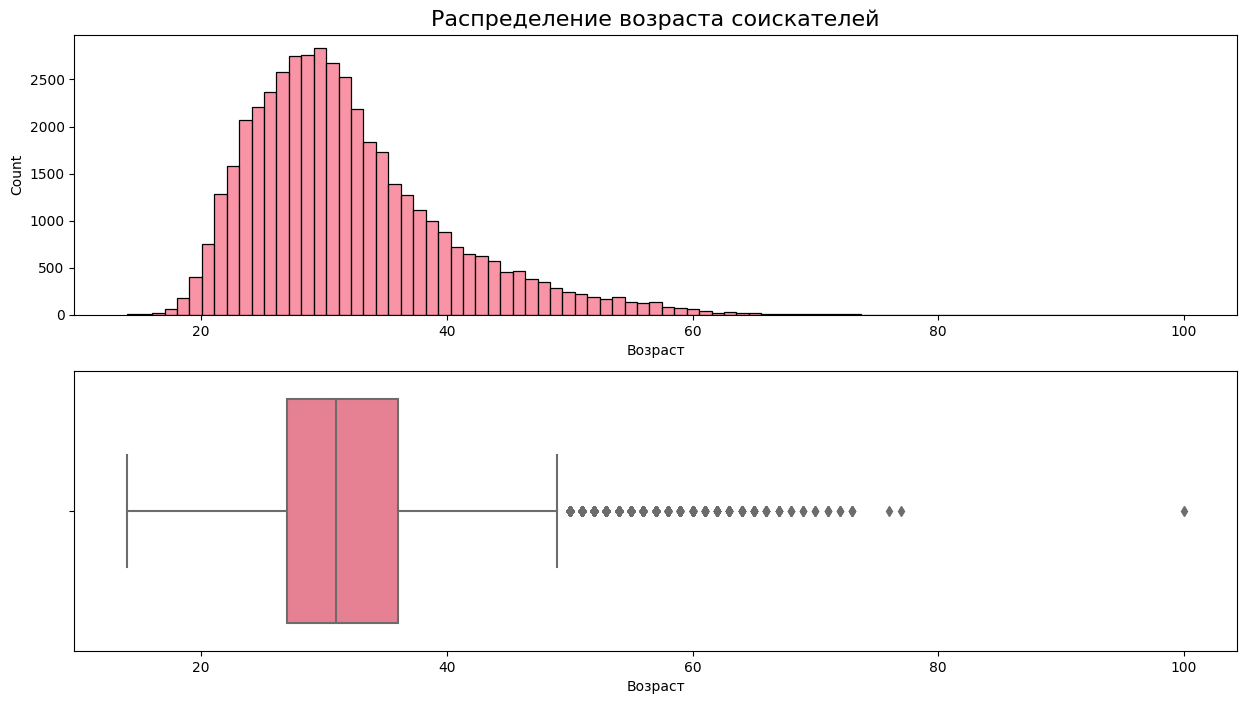

In [412]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
hist = sns.histplot(
    data=hh,
    x='Возраст',
    bins=85,
    ax=axes[0]
);
hist.set_title('Распределение возраста соискателей', fontsize=16)
boxplot = sns.boxplot(
    data=hh,
    x='Возраст',
    ax=axes[1]
);
hh['Возраст'].mode()

Абсолютно обыкновенная гистограмма. Как и ожидалось, большинство соискателей - это люди среднего возраста. В этом ничего необычного. Единственное, что сразу бросается в глаза - это вакансия Frontend-разработчика, которому 100 лет и у которого день рождения 1 января. Понятное дело, что данная вакансия является выбросом, от которого надо будет избавиться вручную.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

1188.0

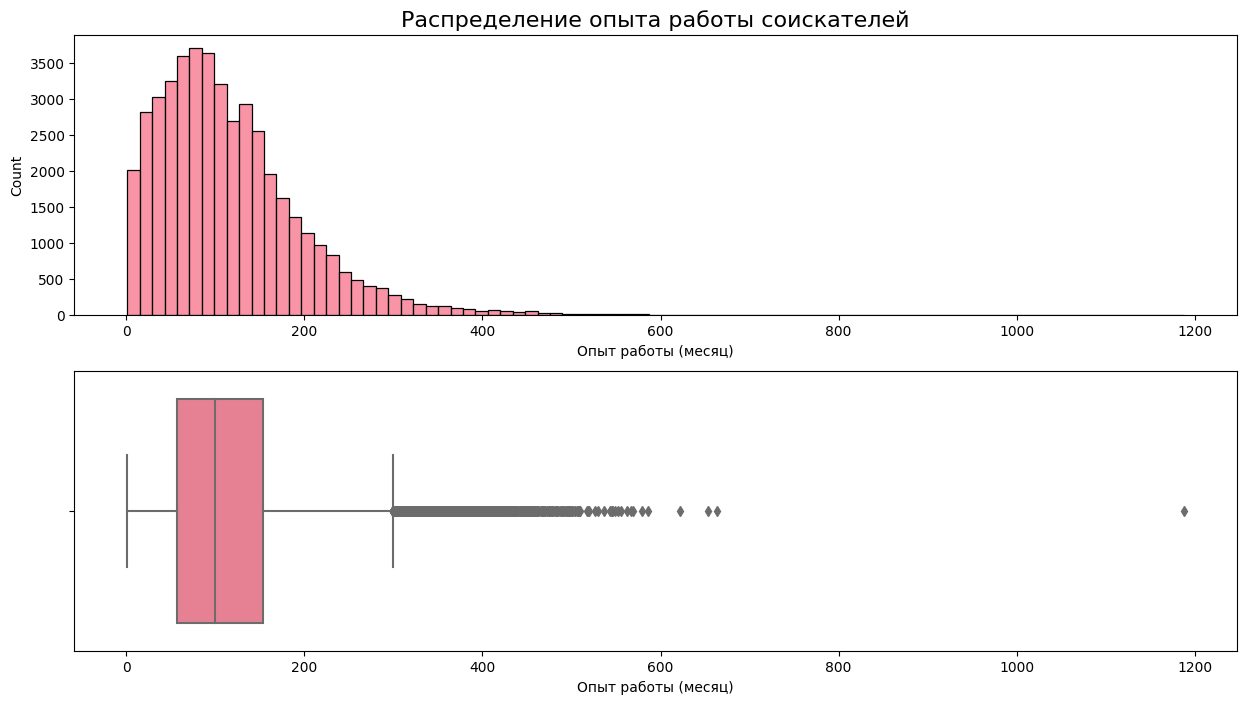

In [413]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
hist = sns.histplot(
    data=hh,
    x='Опыт работы (месяц)',
    bins=85,
    ax=axes[0]
);
hist.set_title('Распределение опыта работы соискателей', fontsize=16)
boxplot = sns.boxplot(
    data=hh,
    x='Опыт работы (месяц)',
    ax=axes[1]
);
hh['Опыт работы (месяц)'].max()

Так же, как и в предыдущем распределении, данные примерно предсказуемы. Большинство соискателей имеют опыт работы от 5 до 10 лет, что является нормой для лиц среднего возраста. Также сразу бросается в глаза выброс со столетним опытом работы (бессмертный пони). Другие вакансии с опытом больше 40 лет, считаю, необходимо рассматривать более детально.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


5

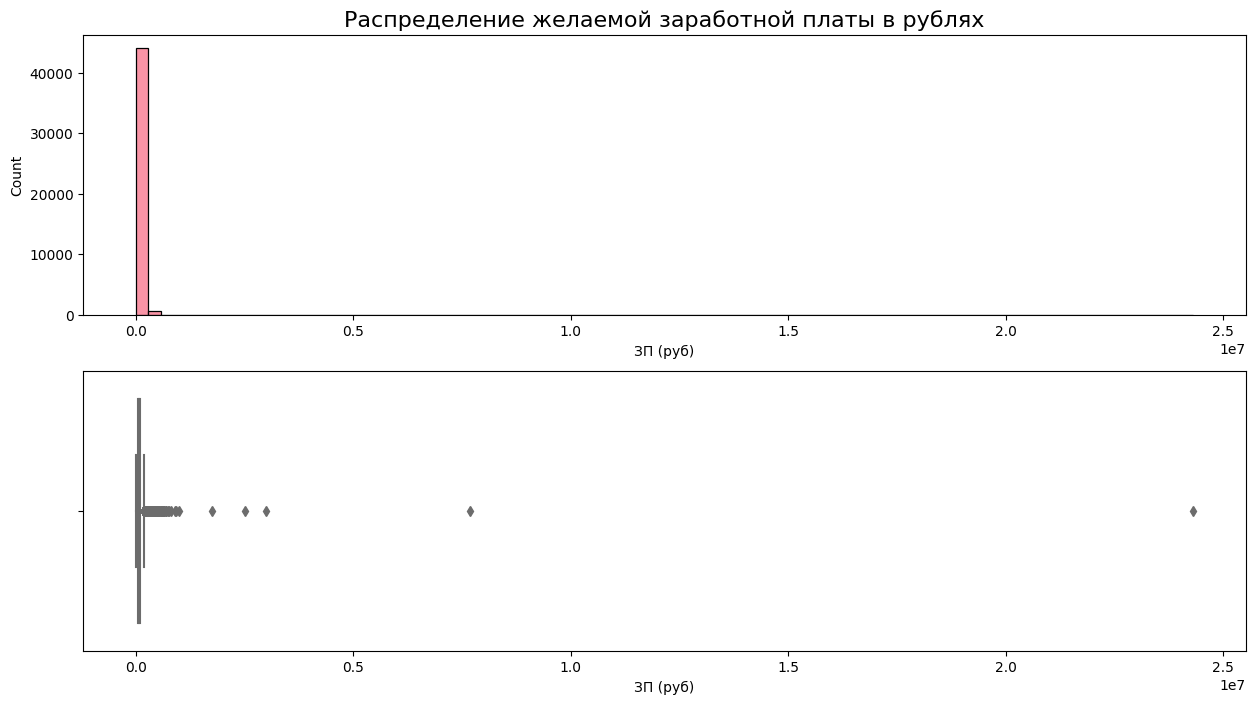

In [414]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
hist = sns.histplot(
    data=hh,
    x='ЗП (руб)',
    bins=85,
    ax=axes[0]
);
hist.set_title('Распределение желаемой заработной платы в рублях', fontsize=16)
boxplot = sns.boxplot(
    data=hh,
    x='ЗП (руб)',
    ax=axes[1]
);
salary_mask = hh['ЗП (руб)'] > 1000000
hh[salary_mask].shape[0]

Для того, чтобы данная гистограмма приносила хоть какую-то пользу, необходимо избавиться, как минимум, от пяти выбросов. Без данных операций информативность данной гистограммы равна нулю.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [415]:
bar_data = hh.groupby(
    by='Образование',
    as_index=False
)[['ЗП (руб)']].median()
salary_mask2 = hh['ЗП (руб)'] < 1000000


fig = px.bar(
    data_frame=bar_data[salary_mask2],
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    text = 'ЗП (руб)',
    orientation='v',
    height=500, 
    width=1000, 
    title='Зависимость медианной заработной платы от уровня образования'
)

fig.show()

C:\Users\Michael Brown\AppData\Local\Temp\ipykernel_13196\2614014240.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Всё достаточно ожидаемо: соискатели с высшим образованием ценят свой труд на порядок выше, чем те, у кого имеется лишь среднее. Также можно заметить, что наличие специальности при среднем образовании никак не увеличивает заработную плату. Следовательно данная диаграмма ещё раз подчёркивает важность наличия диплома о высшем образовании для поиска работы с достойной заработной платой.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

Text(0, 0.5, 'Города')

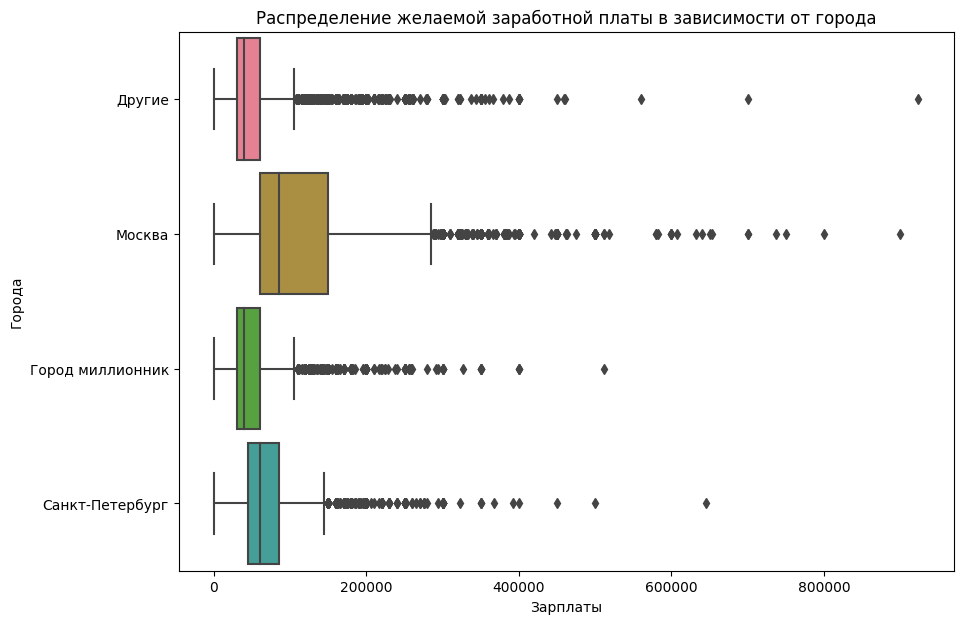

In [416]:
salary_mask2 = hh['ЗП (руб)'] < 1000000
fig = plt.figure(figsize=(10, 7))
box = sns.boxplot(
    data = hh[salary_mask2],
    x = 'ЗП (руб)',
    y = 'Город',
    orient = 'h',
    width = 0.9
)
box.set_title('Распределение желаемой заработной платы в зависимости от города')
box.set_xlabel('Зарплаты')
box.set_ylabel('Города')

Уверен, что работа с выбросами увеличила бы информативность данной диаграммы, но даже и без неё предельно ясно, что зарплаты в Москве выше, чем где-либо. Далее уверенно идёт Петербург, потом города-миллионники, ну и, наконец, все остальные города, где зарплаты совсем невысокие. Это ещё раз подчёркивает сконцентрированность жизни в России вокруг Москвы и Петербурга, что при её огромных территориях не является хорошим показателем.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

Готовность к командировкам         True
Готовность к переезду              True
ЗП (руб)                      65849.455
dtype: object

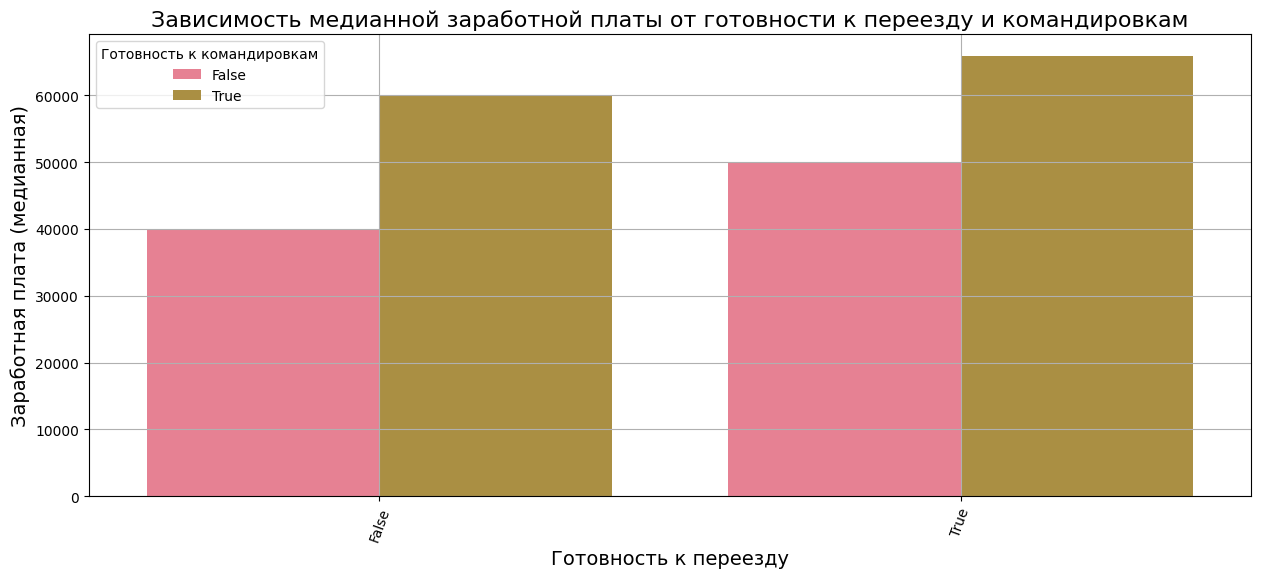

In [417]:
bar_data = hh.groupby(
    by=(['Готовность к командировкам', 'Готовность к переезду']),
    as_index=False
)[['ЗП (руб)']].median()
fig = plt.figure(figsize=(15,6))
barplot = sns.barplot(
    data=bar_data,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue= 'Готовность к командировкам',
    orient='v'
)
barplot.tick_params(axis='x', rotation=70);
barplot.set_title('Зависимость медианной заработной платы от готовности к переезду и командировкам', fontsize=16);
barplot.set_xlabel('Готовность к переезду', fontsize=14);
barplot.set_ylabel('Заработная плата (медианная)', fontsize=14);
barplot.grid()

display(bar_data.max())

Данная диаграмма ещё раз доказывает, что те, кто готов вести разъездной образ жизни(а это в большинстве своём, люди не семейные), имеют гораздо больше карьерных возможностей. Также стоит обратить внимание, что готовность к командировкам гораздо более востребована, чем даже готовность к переезду в другой город без готовности командировок.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

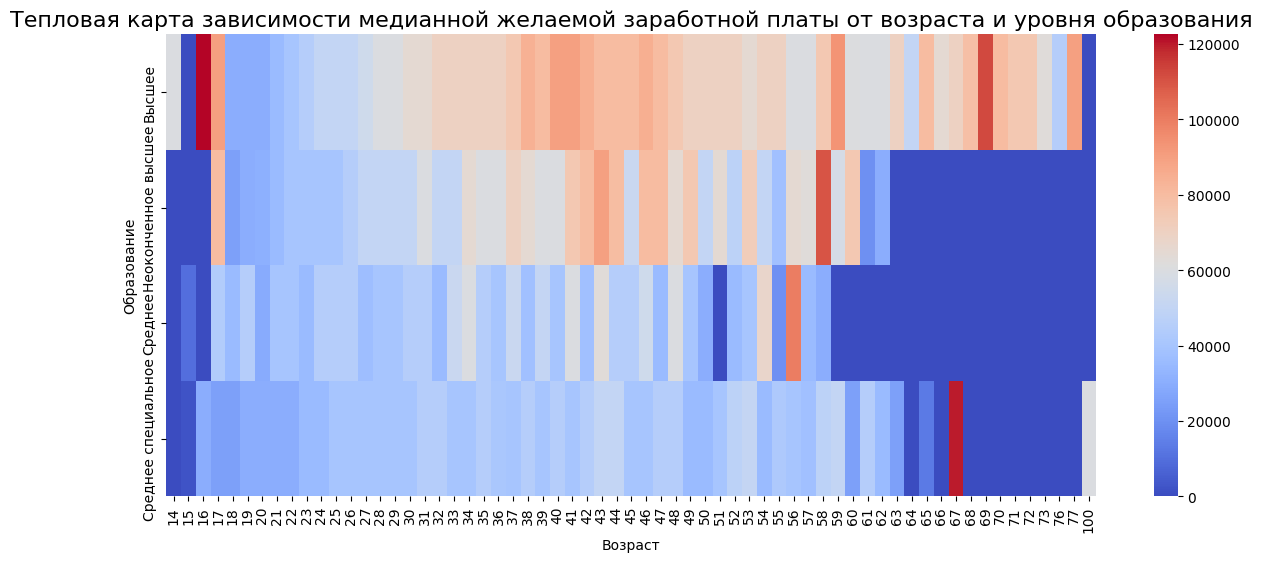

In [418]:
pivot = hh.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    fill_value=0,
    aggfunc='median'
)

figure = plt.figure(figsize=(15,6))
heatmap = sns.heatmap(
    data=pivot, 
    cmap='coolwarm'
)
heatmap.set_title('Тепловая карта зависимости медианной желаемой заработной платы от возраста и уровня образования', fontsize=16);

С одной стороны, всё предельно логично: с возрастом (и, соответственно, с опытом) растёт и желаемая заработная плата. С другой стороны, я бы обратил внимание на то, что данная корреляция отчётливо заметна лишь у соискателей с высшим образованием немного менее заметна у соискателей с неоконченным высшим. У соискателей без высшего образования данный рост совсем незначителен. Так же отчётливо выделяются несколько выборосов в левой верхней и правой нижней частях теплокарты.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

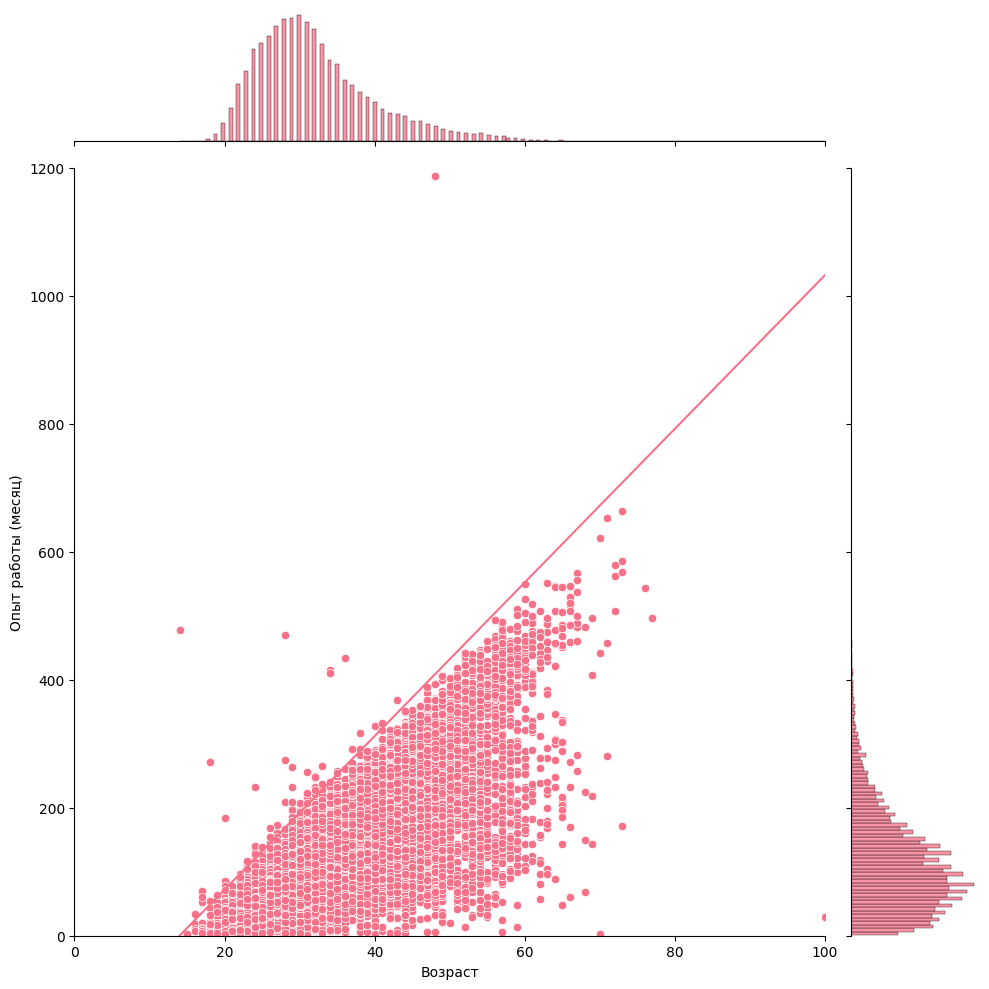

In [419]:
jointplot = sns.jointplot(
    data = hh,
    x = 'Возраст',
    y = 'Опыт работы (месяц)',
    xlim = (0, 100),
    ylim = (0, 1200),
    height = 10,
    kind= 'scatter'
)
sns.lineplot(x=[14, 100], y=[0, 1032]);

Это, на мой взгляд, самая интересная диаграмма. И интересной её делает линия, что я провёл. Согласно ТК РФ лицо не достигшее четырнадцатилетнего возраста не имеет права работать официально (за исключением организаций кинематографа, театров, театральных и концертных организаций и цирков). И то с 14 до 16 лет очень много оговорок для трудоустройства несовершеннолетнего. В общем, данная линия означает разность в 14 лет между возрастом соискателя и его опытом работы. Грубо говоря до 14 лет опыта работы быть не должно, а в 100 лет не может быть больше 86 лет (или 1032 месяцев) опыта работы. Следовательно все резюме, что находятся слева от черты, являются стопроцентно ложными. Как видно, таких резюме немало. Данная диаграмма обнажает множество проблем данной таблицы. Я более, чем уверен, что даже среди тех, кто уложился в правило "разницы 14 лет" немало тех, кто представил ложные сведения. Лично я бы удалил все резюме, где разница между возрастом и опытом работы меньше 16 лет.

***
### В целом, результаты достаточно прогнозируемые. Конечно, есть немало выбросов и с таблицей предстоит ещё очень много работы по очистке данных, но даже уже сейчас мы можем извлечь какую-то полезную информацию.
***

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


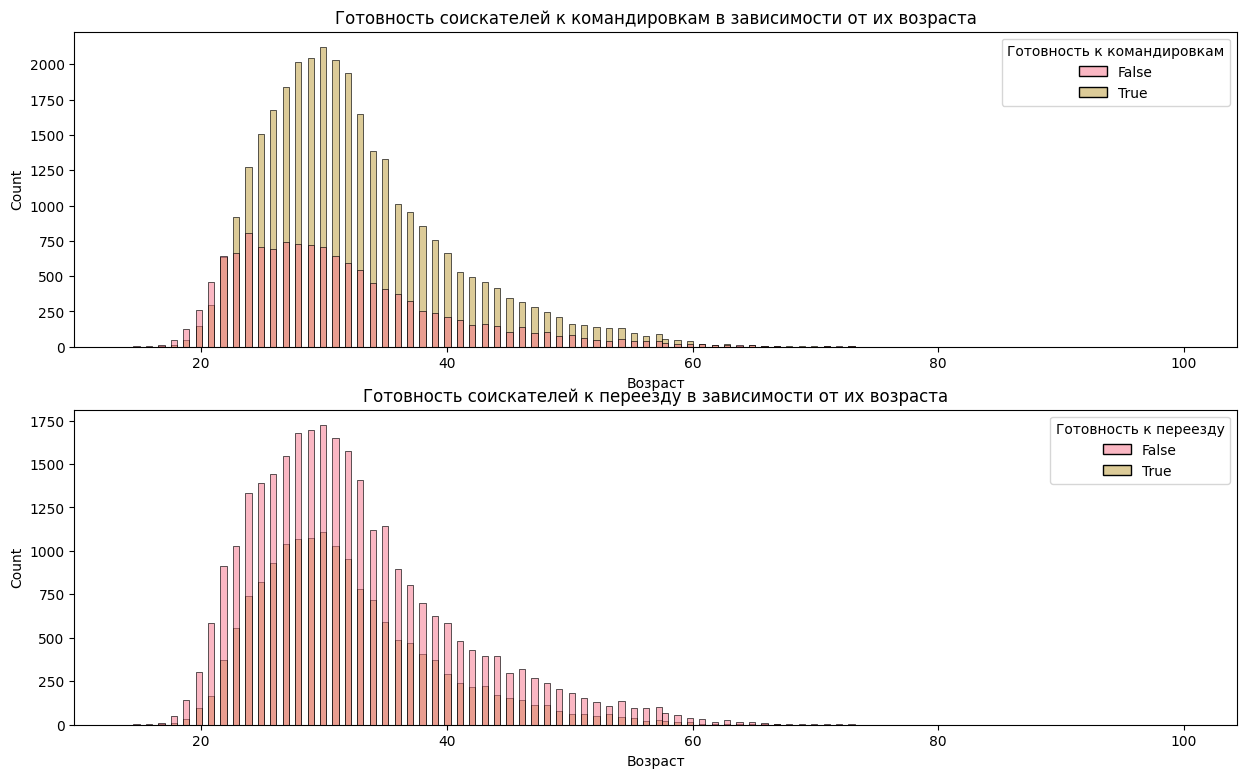

In [420]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,9))
hist1 = sns.histplot(
    data=hh,
    x='Возраст',
    hue='Готовность к командировкам',
    ax = axes[0]
)
hist1.set_title('Готовность соискателей к командировкам в зависимости от их возраста');

hist2 = sns.histplot(
    data=hh,
    x='Возраст',
    hue='Готовность к переезду',
    ax = axes[1]
)
hist2.set_title('Готовность соискателей к переезду в зависимости от их возраста');

В данной гистограмме рассмотрена готовность соискателей к переезду и командировкам в зависимости от их возраста. Если с переездом всё достаточно равномерно (больше резюме - больше готовых к переезду), то в плане командировок отчётливо видно, что соискатели в возрасте от 25 до 40 лет значительно более мобильны, чем те, кто находится в других возрастных группах. Среди молодых соискателей я бы объяснил это учёбой в ВУЗах. Среди возрастных соискателей это можно объяснить семейным образом жизни и отсутствием желания иметь разъездной тип работы.

Text(0, 0.5, 'Пол')

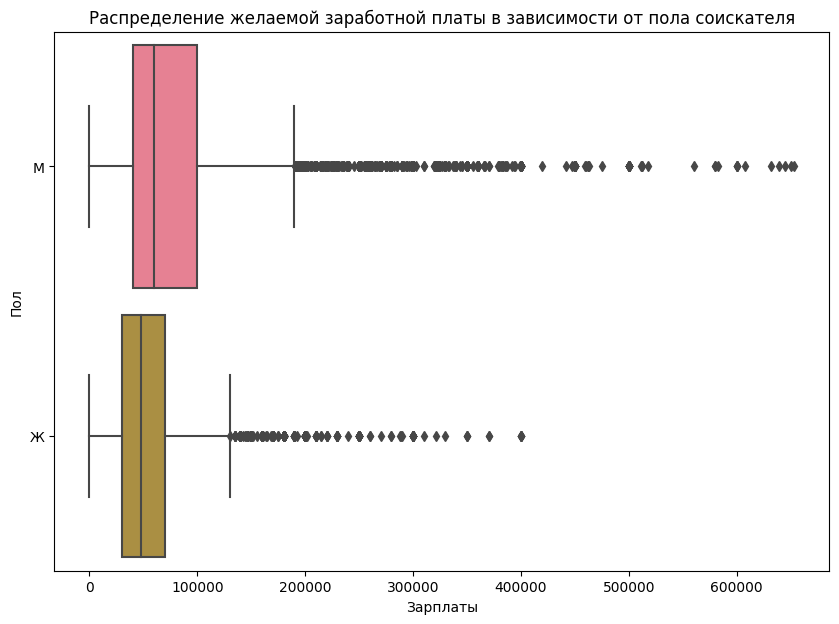

In [421]:
salary_mask2 = hh['ЗП (руб)'] < 700000
fig = plt.figure(figsize=(10, 7))
box = sns.boxplot(
    data = hh[salary_mask2],
    x = 'ЗП (руб)',
    y = 'Пол',
    orient = 'h',
    width = 0.9
)
box.set_title('Распределение желаемой заработной платы в зависимости от пола соискателя')
box.set_xlabel('Зарплаты')
box.set_ylabel('Пол')

Здесь всё примерно ожидаемо. В силу естественных причин, а также консервативного уклада жизни страны, мужчины в среднем зарабатывают больше девушек.

C:\Users\Michael Brown\AppData\Local\Temp\ipykernel_13196\1852940848.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



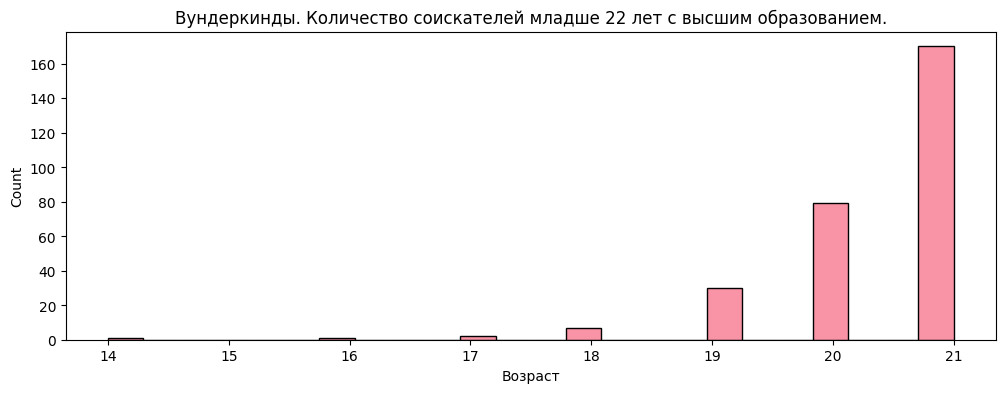

In [422]:
special_mask = hh['Образование'] == 'Высшее'
special_mask2 = hh['Возраст'] < 22
fig = plt.figure(figsize=(12, 4))
hist = sns.histplot(
    data=hh[special_mask][special_mask2],
    x='Возраст'
);
hist.set_title('Вундеркинды. Количество соискателей младше 22 лет с высшим образованием.');

Закончить школу в 16 лет, сразу пойти учиться в ВУЗ и к 21 году стать дипломированным специалистом. Верю. Даже готов поверить в то, что среди более младших соискателей найдутся те, кто реально имеет высшее образование. Однако вот, видится мне, что программе лучше не знать о таких индивидумах, т.к. это реально единицы. В общем, я бы удалил из таблицы все резюме соискателей младше 21 года и указавших высшее образование

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [423]:
dupl_columns = list(hh.columns)

mask = hh.duplicated(subset=dupl_columns)
hh_duplicates = hh[mask]
display(f'Found duplicates:{hh_duplicates.shape[0]}')
hh = hh.drop_duplicates(subset=dupl_columns)
display(f'Результирующее число записей: {hh.shape[0]}')

'Found duplicates:159'

'Результирующее число записей: 44585'

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [424]:
display(hh.info())
44585 - 44417

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44585 entries, 0 to 44743
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44585 non-null  float64
 1   Ищет работу на должность:        44585 non-null  object 
 2   График                           44585 non-null  object 
 3   Последнее/нынешнее место работы  44584 non-null  object 
 4   Последняя/нынешняя должность     44583 non-null  object 
 5   Обновление резюме                44585 non-null  object 
 6   Авто                             44585 non-null  object 
 7   Образование                      44585 non-null  object 
 8   Пол                              44585 non-null  object 
 9   Возраст                          44585 non-null  int64  
 10  Опыт работы (месяц)              44417 non-null  float64
 11  Город                            44585 non-null  object 
 12  Готовность к перее

None

168

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [425]:
m = hh.shape[1]
hh = hh.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

values = {
    'Опыт работы (месяц)': hh['Опыт работы (месяц)'].median()
}
hh = hh.fillna(values)

display(round(hh['Опыт работы (месяц)'].mean()))

114

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [426]:
mask = hh[hh['ЗП (руб)'] > 1000000]
mask2 = hh[hh['ЗП (руб)'] < 1000]
hh = hh.drop(mask.index, axis=0)
hh = hh.drop(mask2.index, axis=0)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [427]:
mask3 = hh[hh['Опыт работы (месяц)'] /12 > hh['Возраст']]
display(mask3.shape[0])
hh = hh.drop(mask3.index, axis=0)

7

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

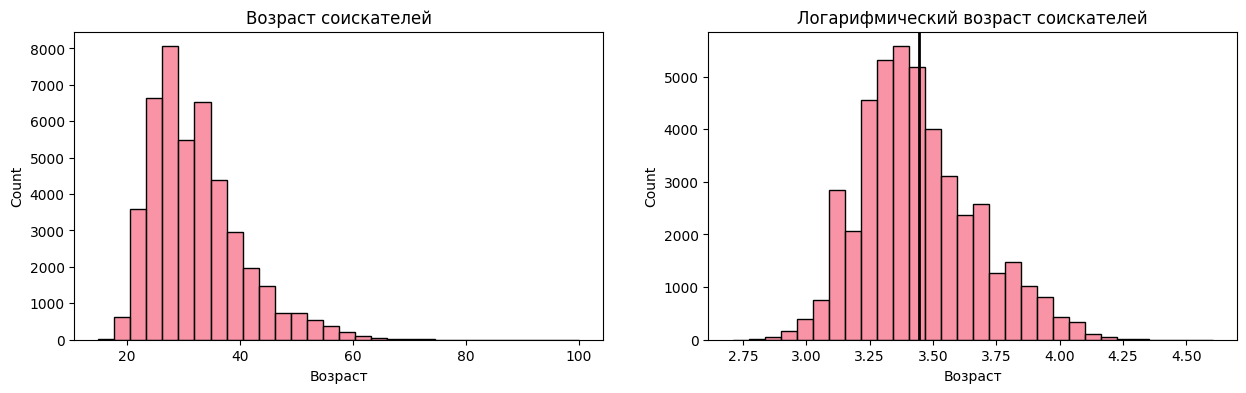

In [428]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

histplot = sns.histplot(hh['Возраст'], bins=30, ax=axes[0])
histplot.set_title('Возраст соискателей');

log_age= np.log(hh['Возраст'])
histplot = sns.histplot(log_age , bins=30, ax=axes[1])
histplot.set_title('Логарифмический возраст соискателей');
histplot.axvline(log_age.mean(), color='k', lw=2)

In [429]:
print(log_age.skew())
print(hh['Возраст'].skew())

0.45241387189124666
1.1252395215886408


In [430]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=4):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [431]:
outliers, cleaned = outliers_z_score_mod(hh, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44484


In [432]:
display(outliers)

,ЗП,Ищет работу на должность:,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,...,вахтовый метод,Список Валют,currency,per,date,time,close,vol,proportion,ЗП (руб)
31137,10000.0,Менеджер по работе с клиентами,"гибкий график, сменный график, удаленная работа","ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,...,False,RUB,NaN,NaN,NaN,NaN,1.0,NaN,1.0,10000.0
32950,2000.0,Тестировщик игр,полный день,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,...,False,RUB,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2000.0
33654,60000.0,Frontend-разработчик,"гибкий график, полный день, удаленная работа",Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,...,False,RUB,NaN,NaN,NaN,NaN,1.0,NaN,1.0,60000.0


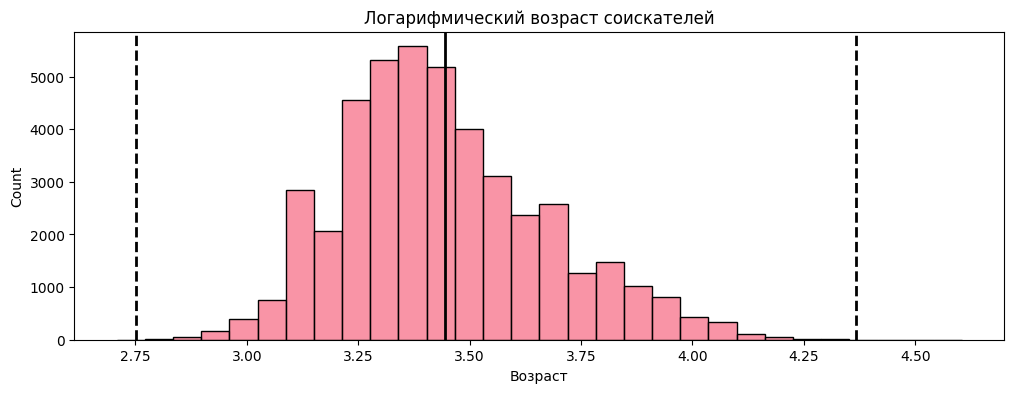

In [433]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
log_age = np.log(hh['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Логарифмический возраст соискателей');

In [434]:
hh = hh.drop(outliers.index, axis=0)
display(hh.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44484 entries, 0 to 44743
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44484 non-null  float64
 1   Ищет работу на должность:        44484 non-null  object 
 2   График                           44484 non-null  object 
 3   Последнее/нынешнее место работы  44484 non-null  object 
 4   Последняя/нынешняя должность     44484 non-null  object 
 5   Обновление резюме                44484 non-null  object 
 6   Авто                             44484 non-null  object 
 7   Образование                      44484 non-null  object 
 8   Пол                              44484 non-null  object 
 9   Возраст                          44484 non-null  int64  
 10  Опыт работы (месяц)              44484 non-null  float64
 11  Город                            44484 non-null  object 
 12  Готовность к перее

None

Отчётливая правосторонняя ассиметрия, что вполне закономерно для данного распределения. В остальном, выбросы незначительны. Там лишь двое пятнадцатилетних соискателей, а также уже известный нам столетний Frontend-разработчик. 

***
### В целом, считаю, что данная таблица ещё не доведена до своего идеала и в ней ещё можно найти много выбросов, однако основная работа по выявлению проведена успешно. Хочу ещё раз обратить внимание, на взаимосвязь опыта работы и возраста. Моё личное мнение, что большинство выбросов можно найти именно в этой диаграмме.

### Подводя итоги, можно провести заключение:
| Задача                              | Статус          |
|:------------------------------------|:---------------:|
| Исследование структуры данных       | **Выполнено**   |
| Преобразование данных               | **Выполнено**   |
| Исследование зависимостей в данных  | **Выполнено**   |
| Очистка данных                      | **Выполнено**   |

## Спасибо за просмотр!
***